In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

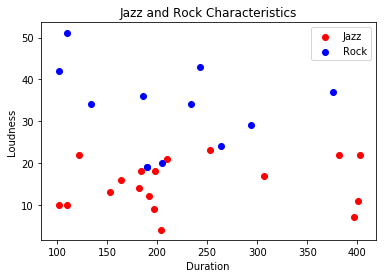

In [274]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [285]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

In [276]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[ 0.4  0.6]]


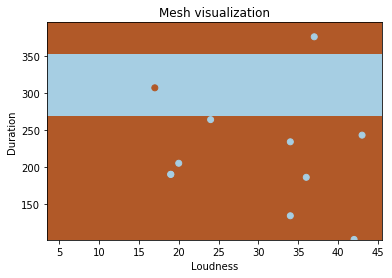

In [277]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)# assign to array of X
Y = np.array(Y) # assign to array of Y

# Mesh size.
h = 42 # assign a mesh with size 4 to var h

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5 # assign x_min to the min of the first column -.5
x_max = X[:, 0].max() + .5 # assign x_max to the max of the first column +.5
y_min = X[:, 1].min() - .5 # assign y_min to the min of the 2nd column -.5
y_max = X[:, 1].max() + .5 # assign y_max to the max of the 2nd column -.5
xx, yy = np.meshgrid(  #https://plot.ly/numpy/meshgrid/ -- creates N-D coordinate grids. each array here contains arrays with an array full of the first item
    np.arange(x_min, x_max, h), # range from xmin to x max stepping by h(4 from above) > Assigned to xx
    np.arange(y_min, y_max, h)  # range ymin to ymax  stepping by h(4 from above) >> assigned to yy
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()]) # store neighbors classification prediction in Z.
                       # ravel flattens > np.array([[1, 2, 3], [4, 5, 6]]) to[1 2 3 4 5 6]
# Put the result into a color plot.
Z = Z.reshape(xx.shape) #reshape Z into the shape of xx{Tuple of array dimensions.} (12, 76)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired) #setting colors
plt.pcolormesh(xx, yy, Z) #plotting a colormap (x y data)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)  #x = all in X column 1. y = all in column 2
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [278]:
xx

array([[  3.5,  45.5],
       [  3.5,  45.5],
       [  3.5,  45.5],
       [  3.5,  45.5],
       [  3.5,  45.5],
       [  3.5,  45.5],
       [  3.5,  45.5],
       [  3.5,  45.5]])

In [279]:
(np.c_[xx.ravel(), yy.ravel()])

array([[   3.5,  101.5],
       [  45.5,  101.5],
       [   3.5,  143.5],
       [  45.5,  143.5],
       [   3.5,  185.5],
       [  45.5,  185.5],
       [   3.5,  227.5],
       [  45.5,  227.5],
       [   3.5,  269.5],
       [  45.5,  269.5],
       [   3.5,  311.5],
       [  45.5,  311.5],
       [   3.5,  353.5],
       [  45.5,  353.5],
       [   3.5,  395.5],
       [  45.5,  395.5]])

In [280]:
np.c_[np.array([[1,2,3]]), np.array([[4,5,6]])]

array([[1, 2, 3, 4, 5, 6]])

In [281]:
xx.shape

(8, 2)

In [282]:
#square root of sum of the squared distances
# find the neighbor that is the min() distance away
# use music / loudness and duration from above
# Loop through two dfs. Save the shortest distance in a var and the index if its the shortest. 
# Return the index from the 
import math 


def NN(a,b):
    for ind, row in music.iterrows():
        loudness = row['loudness']
        duration = row['duration']
        
        #find distance
        dist = np.sqrt(math.pow((a-loudness),2) + math.pow((b-duration),2))
       
        #deal with shortest being empty for the first loop
        if ind == 0:
            shortest = dist
            index = ind
        #store the shortest distance and the index 
        elif dist < shortest:
            shortest = dist
            index = ind
   

    print(shortest)
    print('Loudness: ', music.at[index, 'loudness'])
    print('Duration: ', music.at[index, 'duration'])
    return music.at[index, 'jazz']
            
    
  


In [283]:
print(NN(19,200))
print(NN(20,201))
print(NN(20,202))
print(NN(20,203))


2.2360679775
Loudness:  18
Duration:  198
1
3.60555127546
Loudness:  18
Duration:  198
1
3.0
Loudness:  20
Duration:  205
0
2.0
Loudness:  20
Duration:  205
0


In [288]:
print(neighbors.predict([[19,200]]))
print(neighbors.predict([[20,201]]))
print(neighbors.predict([[20,202]]))
print(neighbors.predict([[20,203]]))






[1]
[1]
[0]
[0]
